<br>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Bangali Comments Sentiment Analysis</h2> 
<br>

<h2 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Table of Contents</h2>

   #### [1. Data collection](#1)
   #### [2. Explory Data Analysis](#2)
   #### [3. Data Preparocessing](#3)
   #### [4. Vectorization](#4)
   #### [5. Model Training](#5)
   #### [6. Model Evaluation](#6)
   #### [7. Deployment](#7)

<a id="1"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 1. Data collection</h2>

#### Source : [https://www.kaggle/input/sentiment-dataset-bangla-text/Social Media Data.xlsx](https://www.kaggle.com/datasets/tasrifnurhimel/sentiment-dataset-bangla-text)

In [158]:
import pandas as pd

In [159]:
df = pd.read_excel('../data/Social Media Data.xlsx')

In [160]:
df.head()

,Tag,Text
0,Negative,মাদ্রিদ হারার পর পুরা মনটাই ভাইঙ্গা গেছে :( কি...
1,Negative,আমি মানুষটা খুব একটা ভালো না। আসলে ভালো থেকে ক...
2,Negative,নোয়াখালীতে একজন মারা গেছে পিকেটারদের ইটের আঘাত...
3,Negative,﻿মন দিতে না পারলে মন ভেঙো না। সুখ দিতে না পারল...
4,Negative,আজাইরা কামে যে প্রচুর সময় নষ্ট করি তা আজকেও আর...


<a id="2"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 2. Exploratory Data Analysis (EDA)</h2>

In [161]:
df.head(2)

,Tag,Text
0,Negative,মাদ্রিদ হারার পর পুরা মনটাই ভাইঙ্গা গেছে :( কি...
1,Negative,আমি মানুষটা খুব একটা ভালো না। আসলে ভালো থেকে ক...


In [162]:
df.isna().sum()

Tag     0
Text    1
dtype: int64

In [163]:
df.isnull().sum()

Tag     0
Text    1
dtype: int64

In [164]:
df.dropna(inplace=True)

In [165]:
df.isnull().sum()

Tag     0
Text    0
dtype: int64

In [166]:
df.shape

(15524, 2)

In [167]:
df.Tag.unique()

array(['Negative', 'Positive'], dtype=object)

In [168]:
df['Label'] = df['Tag'].map({'Positive':1, 'Negative':0}).astype(int)

In [169]:
df.head()

,Tag,Text,Label
0,Negative,মাদ্রিদ হারার পর পুরা মনটাই ভাইঙ্গা গেছে :( কি...,0
1,Negative,আমি মানুষটা খুব একটা ভালো না। আসলে ভালো থেকে ক...,0
2,Negative,নোয়াখালীতে একজন মারা গেছে পিকেটারদের ইটের আঘাত...,0
3,Negative,﻿মন দিতে না পারলে মন ভেঙো না। সুখ দিতে না পারল...,0
4,Negative,আজাইরা কামে যে প্রচুর সময় নষ্ট করি তা আজকেও আর...,0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15524 entries, 0 to 15524
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tag     15524 non-null  object
 1   Text    15524 non-null  object
 2   Label   15524 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 424.5+ KB


In [171]:
df['Label'].value_counts()

Label
1    8015
0    7509
Name: count, dtype: int64

In [172]:
df['num_characters'] = df['Text'].apply(len)

In [173]:
df.head(3)

,Tag,Text,Label,num_characters
0,Negative,মাদ্রিদ হারার পর পুরা মনটাই ভাইঙ্গা গেছে :( কি...,0,130
1,Negative,আমি মানুষটা খুব একটা ভালো না। আসলে ভালো থেকে ক...,0,122
2,Negative,নোয়াখালীতে একজন মারা গেছে পিকেটারদের ইটের আঘাত...,0,52


In [174]:
import nltk

In [175]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [176]:
df.head(3)

,Tag,Text,Label,num_characters,num_words
0,Negative,মাদ্রিদ হারার পর পুরা মনটাই ভাইঙ্গা গেছে :( কি...,0,130,24
1,Negative,আমি মানুষটা খুব একটা ভালো না। আসলে ভালো থেকে ক...,0,122,28
2,Negative,নোয়াখালীতে একজন মারা গেছে পিকেটারদের ইটের আঘাত...,0,52,11


In [177]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [178]:
df.head(3)

,Tag,Text,Label,num_characters,num_words,num_sentences
0,Negative,মাদ্রিদ হারার পর পুরা মনটাই ভাইঙ্গা গেছে :( কি...,0,130,24,1
1,Negative,আমি মানুষটা খুব একটা ভালো না। আসলে ভালো থেকে ক...,0,122,28,3
2,Negative,নোয়াখালীতে একজন মারা গেছে পিকেটারদের ইটের আঘাত...,0,52,11,1


In [179]:
df.loc[0]

Tag                                                        Negative
Text              মাদ্রিদ হারার পর পুরা মনটাই ভাইঙ্গা গেছে :( কি...
Label                                                             0
num_characters                                                  130
num_words                                                        24
num_sentences                                                     1
Name: 0, dtype: object

In [180]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,15524.000000,15524.000000,15524.000000
mean,70.498647,13.506184,1.112858
std,82.493151,14.905030,0.486384
min,2.000000,1.000000,1.000000
25%,27.000000,5.000000,1.000000
50%,50.000000,10.000000,1.000000
75%,89.000000,17.000000,1.000000
max,2900.000000,427.000000,11.000000


In [181]:
df['Label'].value_counts()

Label
1    8015
0    7509
Name: count, dtype: int64

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Label', ylabel='count'>

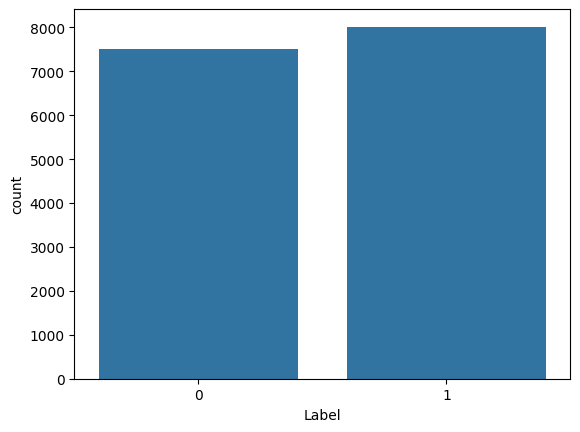

In [183]:
sns.countplot(x='Label', data=df)

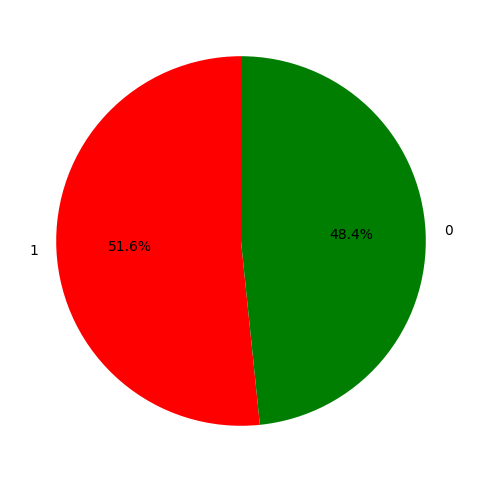

In [184]:
label_counts = df['Label'].value_counts()

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#fe0000','#007e02'])
plt.show()

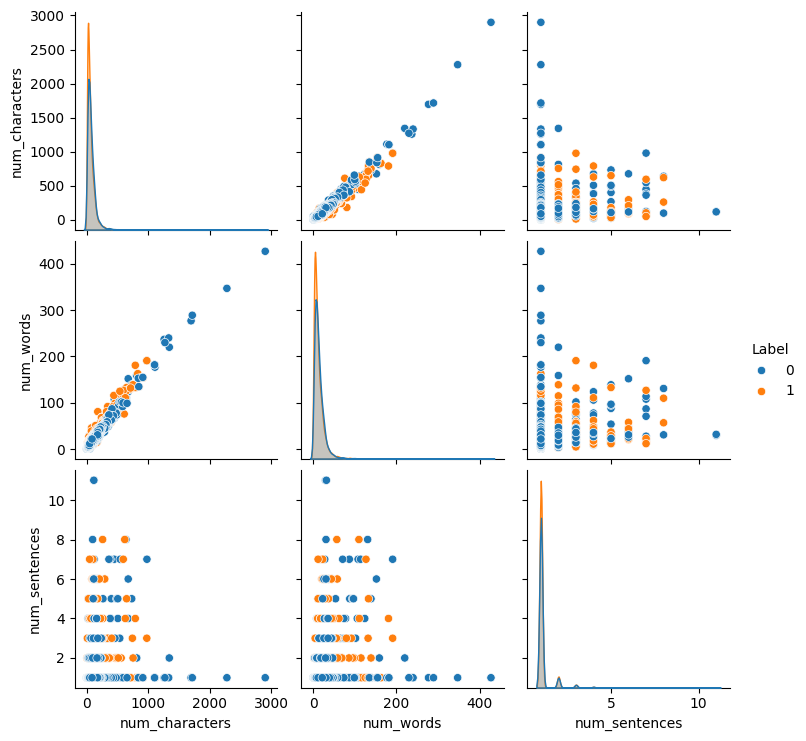

In [185]:
sns.pairplot(df,hue='Label')

In [186]:
df[df['Label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7509.000000,7509.000000,7509.000000
mean,76.124917,14.445998,1.120655
std,93.910557,16.425626,0.513106
min,2.000000,1.000000,1.000000
25%,31.000000,6.000000,1.000000
50%,56.000000,11.000000,1.000000
75%,95.000000,18.000000,1.000000
max,2900.000000,427.000000,11.000000


In [187]:
df[df['Label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,8015.000000,8015.000000,8015.000000
mean,65.227573,12.625702,1.105552
std,69.725290,13.264670,0.459856
min,7.000000,1.000000,1.000000
25%,23.000000,4.000000,1.000000
50%,45.000000,9.000000,1.000000
75%,83.000000,16.000000,1.000000
max,978.000000,191.000000,8.000000


<Axes: xlabel='num_characters', ylabel='Count'>

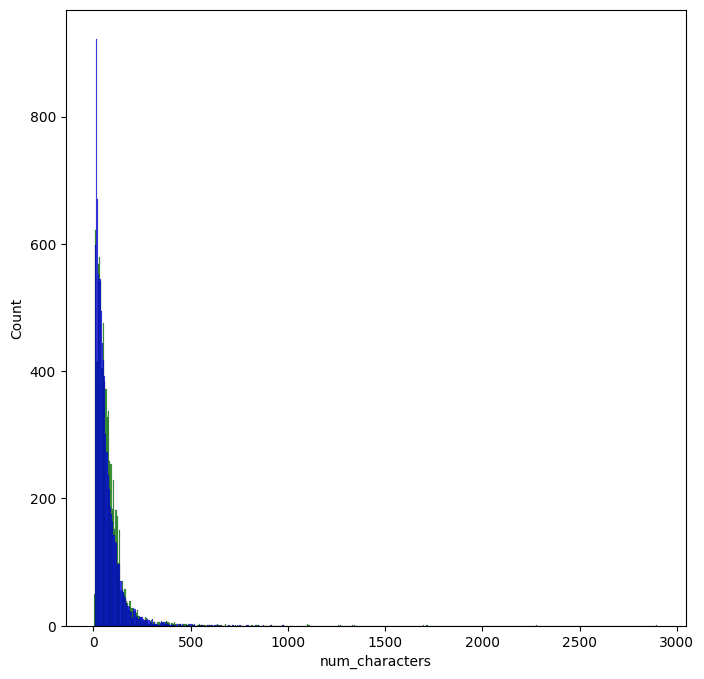

In [188]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['Label'] == 0]['num_characters'],color='green')
sns.histplot(df[df['Label'] == 1]['num_characters'],color='blue')

<Axes: xlabel='num_words', ylabel='Count'>

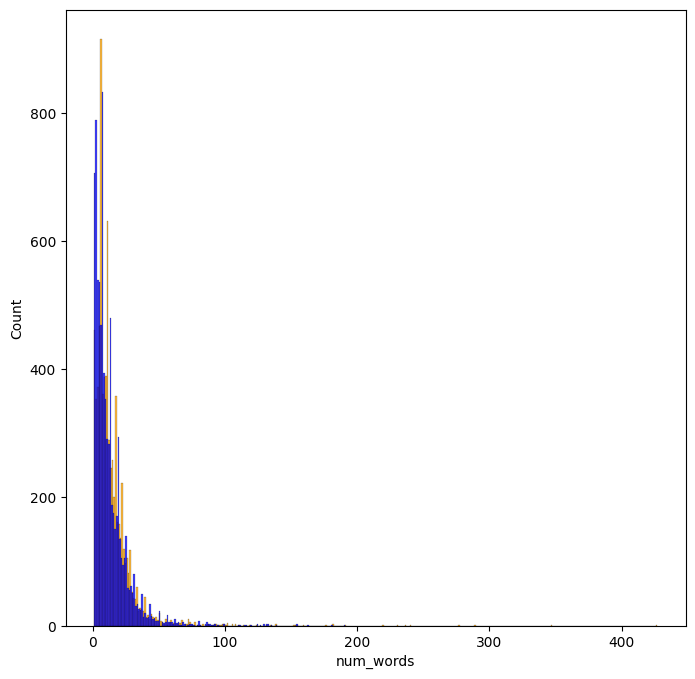

In [189]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['Label'] == 0]['num_words'],color='orange')
sns.histplot(df[df['Label'] == 1]['num_words'],color='blue')

<Axes: xlabel='num_sentences', ylabel='Count'>

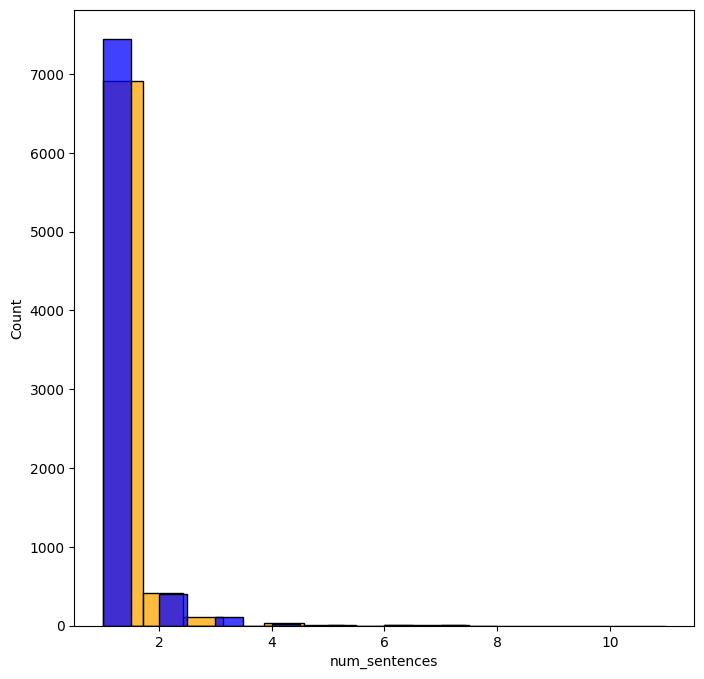

In [190]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['Label'] == 0]['num_sentences'],color='orange')
sns.histplot(df[df['Label'] == 1]['num_sentences'],color='blue')

<a id="3"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 3. Data Preprocessing</h2>

In [191]:
import re
import nltk
from nltk.corpus import stopwords
from indicnlp.tokenize import indic_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emon1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [192]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text) 
    # Remove hashtags 
    text = re.sub(r'#\w+', '', text)  
    # Clean specific HTML entities and single quotes
    text = re.sub(r'&amp;|<br />|\'', ' ', text)
    # Keep only Bengali characters and whitespace  
    text = re.sub(r'[^\u0980-\u09FF\s]', ' ', text)  
    # Remove numbers (both English and Bengali)
    text = re.sub(r'[0-9০-৯]', '', text) 
    # Remove extra whitespace and trim 
    text = re.sub(r'\s+', ' ', text).strip()  

    # Tokenize the text using the Indic NLP library
    words = indic_tokenize.trivial_tokenize(text, lang='bn')

    # Get the set of Bengali stopwords
    stop_words = set(stopwords.words('bengali'))

    # Filter out stopwords and remove any empty strings
    result = [word for word in words if word and word not in stop_words]

    # Join the filtered words back into a single string
    return ' '.join(result)

# Example usage
result = preprocess_text("@RainnyMemories: অনেক দেখলাম, বুঝলাম এই পৃথিবীতে আমাকে বোঝার মতো কেউ নেই। আফসোস :(you don't know yourself.)")

print(result)

দেখলাম বুঝলাম পৃথিবীতে বোঝার আফসোস


In [193]:
df['Text'][2]

'নোয়াখালীতে একজন মারা গেছে পিকেটারদের ইটের আঘাতে :((('

In [194]:
preprocess_text('নোয়াখালীতে একজন মারা গেছে পিকেটারদের ইটের আঘাতে :(((')

'নোয়াখালীতে একজন মারা পিকেটারদের ইটের আঘাতে'

In [195]:
df['Cleaned'] = df['Text'].apply(preprocess_text)

Most common word

In [196]:
df.head(1)

,Tag,Text,Label,num_characters,num_words,num_sentences,Cleaned
0,Negative,মাদ্রিদ হারার পর পুরা মনটাই ভাইঙ্গা গেছে :( কি...,0,130,24,1,মাদ্রিদ হারার পুরা মনটাই ভাইঙ্গা ভালো লাগেনা ত...


In [197]:
neg_corpus = []
for msg in df[df['Label'] == 0]['Cleaned'].tolist():
    for word in msg.split():
        neg_corpus.append(word)

In [198]:
neg_corpus

['মাদ্রিদ',
 'হারার',
 'পুরা',
 'মনটাই',
 'ভাইঙ্গা',
 'ভালো',
 'লাগেনা',
 'তারিখ',
 'কোপেনহেগেন',
 'সাথে',
 'হোম',
 'ম্যাচ',
 'মানুষটা',
 'একটা',
 'ভালো',
 'আসলে',
 'ভালো',
 'সুবিধা',
 'ভালো',
 'দেখেছি',
 'এটার',
 'দামই',
 'নোয়াখালীতে',
 'একজন',
 'মারা',
 'পিকেটারদের',
 'ইটের',
 'আঘাতে',
 'মন',
 'পারলে',
 'মন',
 'ভেঙো',
 'সুখ',
 'পারলে',
 'কষ্ট',
 'দিওনা',
 'ভালোবাসতে',
 'পারলে',
 'অভিনয়',
 'করিও',
 'অভিনয়',
 'কারো',
 'জীবন',
 'নষ্ট',
 'করো',
 'আজাইরা',
 'কামে',
 'প্রচুর',
 'সময়',
 'নষ্ট',
 'আজকেও',
 'আরেকবার',
 'প্রমান',
 'হইলো',
 'কামের',
 'সময়',
 'খালি',
 'ঘুম',
 'আসে',
 'সমস্যা',
 'একজন',
 'লাইক',
 'ভিক্কা',
 'চাইছিল',
 'দি',
 'গালা',
 'গালি',
 'করলো',
 'দরকার',
 'ভার্চুয়াল',
 'খ্যাতি',
 'সামান্য',
 'একটা',
 'লাইক',
 'বছর',
 'পিছনে',
 'ইচ্ছে',
 'ইস',
 'সত্যি',
 'বছর',
 'পিছনে',
 'পারতাম',
 'ভুল',
 'গুলো',
 'শুধরে',
 'পারতাম',
 'বাংলা',
 'লায়ন',
 'একটা',
 'বাল',
 'আজকের',
 'রোমান্টিক',
 'ওয়েদার',
 'মুখটা',
 'খারাপ',
 'করাইল',
 'স্বীকার্যগুলো',
 'মাথায়',
 'ঢুকছে',
 'পুরাই',
 'মাথা

In [199]:
len(neg_corpus)

68240

In [200]:
from collections import Counter

Counter(neg_corpus)

Counter({'নাটক': 1941,
         'ফালতু': 805,
         'একটা': 648,
         'ভালো': 478,
         'ভাই': 464,
         'টা': 347,
         'কথা': 330,
         'হয়ে': 300,
         'বাজে': 293,
         'নাটকের': 291,
         'সাথে': 269,
         'ভাল': 259,
         'বালের': 255,
         'যায়': 246,
         'এক': 246,
         'মানুষ': 244,
         'খারাপ': 237,
         'দিয়ে': 227,
         'লাগে': 219,
         'মত': 217,
         'সময়': 200,
         'অভিনয়': 177,
         'নাটকে': 173,
         'নষ্ট': 171,
         'টাকা': 168,
         'এসব': 166,
         'নাম': 158,
         'বাংলাদেশের': 150,
         'দেশের': 139,
         'পরিচালক': 137,
         'একটু': 136,
         'বাংলা': 134,
         'শেষ': 133,
         'এতো': 128,
         'বড়': 126,
         'সবাই': 125,
         'দেশে': 121,
         'গুলো': 120,
         'বাংলাদেশ': 114,
         'হয়েছে': 114,
         'মানুষের': 112,
         'আশা': 112,
         'একজন': 109,
         'ছাড়া': 109,
         'বাল': 106,
  

In [201]:
Counter(neg_corpus).most_common(10)

[('নাটক', 1941),
 ('ফালতু', 805),
 ('একটা', 648),
 ('ভালো', 478),
 ('ভাই', 464),
 ('টা', 347),
 ('কথা', 330),
 ('হয়ে', 300),
 ('বাজে', 293),
 ('নাটকের', 291)]

In [202]:
pd.DataFrame(Counter(neg_corpus).most_common(10))

,0,1
0,নাটক,1941
1,ফালতু,805
2,একটা,648
3,ভালো,478
4,ভাই,464
5,টা,347
6,কথা,330
7,হয়ে,300
8,বাজে,293
9,নাটকের,291


In [203]:
pos_corpus = []
for msg in df[df['Label'] == 1]['Cleaned'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

In [204]:
pos_corpus

['আকাশপ্রদীপ',
 'জ্বলে',
 'ুভরাত্রি',
 'সূর্য',
 'অস্ত',
 'রাত',
 'জন্ম',
 'মামারা',
 'ঘুম',
 'উঠলা',
 'উঠছি',
 'তোমরা',
 'উঠলে',
 'লাইক',
 'মেরে',
 'কমেন্টে',
 'আসো',
 'একটু',
 'সকাল',
 'বেলা',
 'শুভ',
 'রাত্রি',
 'পাকিস্তান',
 'হারছে',
 'রে',
 'মজা',
 'প্রোটিয়াস',
 'দ্য',
 'বিউটি',
 'শুভ',
 'রাত্রি',
 'ভাল',
 'করেছ',
 'শুভ',
 'রাত্রি',
 'ভাল',
 'থেকো',
 'বছরের',
 'আনন্দময়',
 'দিনটি',
 'সবটুকু',
 'রঙে',
 'তোমায়',
 'রাঙিয়ে',
 'দিক',
 'উৎসবের',
 'প্রতিটি',
 'মুহূর্ত',
 'হয়ে',
 'উঠুক',
 'আরো',
 'উজ্জ্বল',
 'ঈদ',
 'ঘুম',
 'ঘুম',
 'রাত',
 'শেষে',
 'সূর্য',
 'উঠলো',
 'হেসে',
 'ফুটলো',
 'ভোরের',
 'আলো',
 'দিনটা',
 'কাটুক',
 'ভালো',
 'সালের',
 'সেরা',
 'কাপল',
 'সবাই',
 'দোয়া',
 'হাঁটতে',
 'তে',
 'এসিয়ান',
 'মিউজিক',
 'আওয়ার',
 'এক্কেবারে',
 'জমিয়ে',
 'দিছে',
 'উপভোগ',
 'করছি',
 'সাথে',
 'কারন',
 'ছাড়া',
 'ঘন্টার',
 'ঘন্টা',
 'কথা',
 'যায়',
 'এক',
 'কথা',
 'ব',
 'মুরগি',
 'শেয়াল',
 'গুলো',
 'জোস',
 'হইছে',
 'আবেগের',
 'ভালোবাসা',
 'দিওনা',
 'মনের',
 'ভালোবাসা',
 'দিও',
 'কারন',
 'আবেগের',
 'ভ

In [205]:
len(pos_corpus)

62467

In [206]:
Counter(pos_corpus)

Counter({'নাটক': 3643,
         'ভালো': 2084,
         'অসাধারণ': 1866,
         'সুন্দর': 1577,
         'ভাই': 1145,
         'একটা': 1100,
         'ভাল': 816,
         'টা': 777,
         'ধন্যবাদ': 733,
         'লাগলো': 684,
         'সেরা': 647,
         'নিশো': 590,
         'অসাধারন': 581,
         'লাগছে': 480,
         'অভিনয়': 457,
         'এক': 433,
         'নাটকটা': 406,
         'নাটকের': 401,
         'সত্যি': 354,
         'উপহার': 301,
         'হয়েছে': 292,
         'ছিলো': 288,
         'কথা': 285,
         'অপূর্ব': 280,
         'আরিয়ান': 269,
         'কথায়': 260,
         'লাগে': 253,
         'সাথে': 250,
         'দেখলাম': 249,
         'ভালোবাসা': 236,
         'লেগেছে': 236,
         'গল্প': 229,
         'নাটকটি': 224,
         'শেষ': 223,
         'নামাজের': 222,
         'নামাজ': 222,
         'আরো': 217,
         'এতো': 215,
         'বস': 209,
         'নাটকে': 189,
         'দারুন': 184,
         'খুবই': 182,
         'গুলো': 180,
         'সত্যিই': 

In [207]:
Counter(pos_corpus).most_common(10)

[('নাটক', 3643),
 ('ভালো', 2084),
 ('অসাধারণ', 1866),
 ('সুন্দর', 1577),
 ('ভাই', 1145),
 ('একটা', 1100),
 ('ভাল', 816),
 ('টা', 777),
 ('ধন্যবাদ', 733),
 ('লাগলো', 684)]

In [208]:
pd.DataFrame(Counter(pos_corpus).most_common(10))

,0,1
0,নাটক,3643
1,ভালো,2084
2,অসাধারণ,1866
3,সুন্দর,1577
4,ভাই,1145
5,একটা,1100
6,ভাল,816
7,টা,777
8,ধন্যবাদ,733
9,লাগলো,684


<a id="4"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 4. Vectorization</h2>

In [209]:
from sklearn.feature_extraction.text import CountVectorizer

In [210]:
cv = CountVectorizer()

In [211]:
x = cv.fit_transform(df['Cleaned']).toarray()
y = df['Label']

In [212]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

<a id="5"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 5. Model Selection</h2>

In [215]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [216]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [217]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [218]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    percision = precision_score(y_test,y_pred)
    return accuracy,percision

In [219]:
train_classifier(knc,x_train,y_train,x_test,y_test)

(0.768438003220612, 0.7494356659142212)

In [220]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.6473429951690821
Precision -  0.6569839307787392
For  KN
Accuracy -  0.768438003220612
Precision -  0.7494356659142212
For  NB
Accuracy -  0.8235104669887279
Precision -  0.8104767510300177
For  DT
Accuracy -  0.7597423510466988
Precision -  0.9108341323106424
For  LR
Accuracy -  0.8247987117552334
Precision -  0.8458523840627041
For  RF
Accuracy -  0.8247987117552334
Precision -  0.8490441661173368


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.7987117552334944
Precision -  0.8118622448979592
For  BgC
Accuracy -  0.8077294685990338
Precision -  0.8232647814910026
For  ETC
Accuracy -  0.8331723027375201
Precision -  0.8653198653198653
For  GBDT
Accuracy -  0.7913043478260869
Precision -  0.8891605541972291
For  xgb
Accuracy -  0.8186795491143317
Precision -  0.855191256830601


In [221]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [222]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.833172,0.865320
4,LR,0.824799,0.845852
5,RF,0.824799,0.849044
2,NB,0.823510,0.810477
10,xgb,0.818680,0.855191
7,BgC,0.807729,0.823265
6,AdaBoost,0.798712,0.811862
9,GBDT,0.791304,0.889161
1,KN,0.768438,0.749436
3,DT,0.759742,0.910834


In [223]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

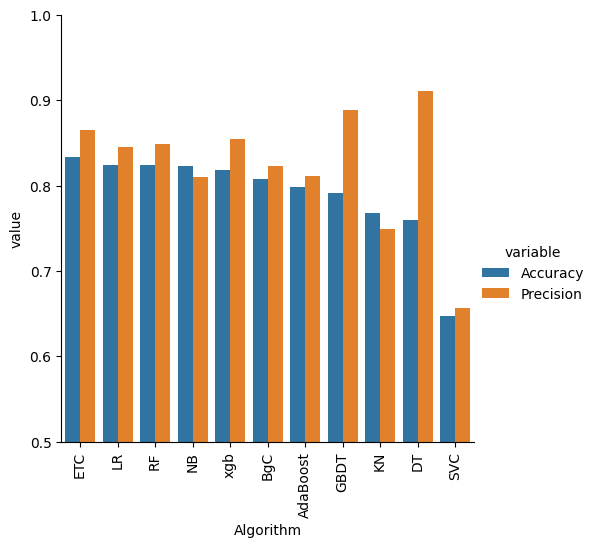

In [224]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [225]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft':accuracy_scores,'Precision_max_ft':precision_scores}).sort_values('Precision_max_ft',ascending=False)

In [226]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [227]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [228]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [229]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [230]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.833172,0.865320,0.833172,0.865320,0.833172,0.865320,0.833172,0.865320
1,LR,0.824799,0.845852,0.824799,0.845852,0.824799,0.845852,0.824799,0.845852
2,RF,0.824799,0.849044,0.824799,0.849044,0.824799,0.849044,0.824799,0.849044
3,NB,0.823510,0.810477,0.823510,0.810477,0.823510,0.810477,0.823510,0.810477
4,xgb,0.818680,0.855191,0.818680,0.855191,0.818680,0.855191,0.818680,0.855191
5,BgC,0.807729,0.823265,0.807729,0.823265,0.807729,0.823265,0.807729,0.823265
6,AdaBoost,0.798712,0.811862,0.798712,0.811862,0.798712,0.811862,0.798712,0.811862
7,GBDT,0.791304,0.889161,0.791304,0.889161,0.791304,0.889161,0.791304,0.889161
8,KN,0.768438,0.749436,0.768438,0.749436,0.768438,0.749436,0.768438,0.749436
9,DT,0.759742,0.910834,0.759742,0.910834,0.759742,0.910834,0.759742,0.910834


<a id="6"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 6. Model Evaluation</h2>

In [231]:
# voting classifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [232]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('et',etc),('lrc',lrc),('rfc',rfc),('xgb',xgb),('gbdt',gbdt)],voting='soft')

In [233]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('lrc',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...)),
                             ('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2))],
                 voting='soft')

In [234]:
model = voting
voting = model

In [235]:
y_pred = voting.predict(x_test)
print('Accuracy:...',accuracy_score(y_test,y_pred))
print('Precision:...',precision_score(y_test,y_pred))

Accuracy:... 0.8405797101449275
Precision:... 0.8884992987377279


In [236]:
# applying stacking
estimators = [('lrc',lrc),('rfc',rfc),('xgb',xgb),('gbdt',gbdt)]

final_estimator = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [237]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [238]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.8251207729468599
Precision 0.864010989010989


<a id="7"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 7. Deployment</h2>

In [240]:
import pickle

pickle.dump(cv,open('../models/vectorizer.pkl','wb'))
pickle.dump(model,open('../models/model.pkl','wb'))